## 1.Environment Setup

In [40]:
# Import thư viện cần thiết
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

warnings.filterwarnings('ignore')

# Đặt seed để đảm bảo kết quả nhất quán giữa các lần chạy
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")

Seed: 42


## 2.Data Processing

In [41]:
# # https://drive.google.com/drive/folders/1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7?usp=drive_link
# !gdown --folder 1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7

In [42]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y

### 2.1 Original Dataset

In [43]:

X_train, y_train = read_csv('../data/processed/raw_train.csv')
X_val, y_val = read_csv('../data/processed/raw_val.csv')
X_test, y_test = read_csv('../data/processed/raw_test.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.2 FE Dataset

In [44]:
X_fe_train, y_fe_train = read_csv('../data/processed/fe_train.csv')
X_fe_val, y_fe_val =  read_csv('../data/processed/fe_val.csv')
X_fe_test, y_fe_test = read_csv('../data/processed/fe_test.csv')

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.3 Original + DT Dataset

In [45]:
X_dt_train, y_dt_train = read_csv('../data/processed/dt_train.csv')
X_dt_val, y_dt_val = read_csv('../data/processed/dt_val.csv')
X_dt_test, y_dt_test = read_csv('../data/processed/dt_test.csv')

,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,0.000000,-0.445445,0.458139,-0.729485,0.708371,1.0,0.5,0.0,1
1,0.0,0.333333,0.000000,-0.891627,0.230598,0.050166,0.222495,1.0,0.0,0.0,0
2,0.0,0.333333,0.333333,-0.891627,0.723605,-0.061212,0.399178,0.0,0.0,1.0,0
3,1.0,0.333333,0.000000,-0.891627,1.121803,-0.061212,0.266666,1.0,0.0,0.0,0
4,1.0,1.000000,0.000000,-0.713154,-0.167601,0.272924,-1.190962,0.0,0.5,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,0.0,1.000000,0.0,-0.713154,-0.262410,-1.063621,0.089984,0.0,0.5,1.0,0
1,0.0,1.000000,1.0,1.250048,1.368307,1.720848,-1.809349,1.0,0.5,0.0,1
2,1.0,0.666667,0.0,0.536156,-0.338257,-0.061212,0.664201,1.0,0.0,0.0,0
3,0.0,0.666667,0.0,-0.891627,0.040979,0.941197,0.973394,0.0,0.0,0.0,0
4,1.0,1.000000,0.0,-0.445445,-0.300333,0.495681,0.487519,1.0,0.5,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,1.0,1.071575,-0.641646,0.384303,-0.837597,1.0,0.5,1.0,1
1,0.0,0.000000,0.0,-0.891627,-1.286348,-2.288787,1.061736,1.0,0.0,0.0,0
2,1.0,0.666667,1.0,0.714629,-0.357219,0.829818,-0.175039,1.0,0.5,0.0,0
3,0.0,0.666667,0.0,-0.445445,0.116827,-0.395349,-0.042528,0.0,0.0,0.0,0
4,1.0,0.666667,0.0,-0.177735,-0.186562,-1.397757,1.945146,1.0,1.0,0.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


### 2.4 FE + DT Dataset

In [46]:
X_fe_dt_train, y_fe_dt_train =  read_csv('../data/processed/fe_dt_train.csv')
X_fe_dt_val, y_fe_dt_val = read_csv('../data/processed/fe_dt_val.csv')
X_fe_dt_test, y_fe_dt_test = read_csv('../data/processed/fe_dt_test.csv')

,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,1.0,0.952258,0.726265,-0.445445,0.458139,-0.729485,1.0,0.0,1
1,1.0,0.0,1.0,0.082082,-0.054469,-0.891627,0.230598,0.050166,1.0,0.0,0
2,1.0,0.0,0.0,0.606839,0.099522,-0.891627,0.723605,-0.061212,0.0,0.0,0
3,0.0,0.0,1.0,0.965051,0.031766,-0.891627,1.121803,-0.061212,1.0,0.0,0
4,0.0,1.0,1.0,-0.411237,-0.859761,-0.713154,-0.167601,0.272924,0.0,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,1.0,1.0,1.0,0.524962,0.628019,-0.713154,-0.262410,-1.063621,0.0,0.0,0
1,1.0,1.0,0.0,-0.068646,-1.592443,1.250048,1.368307,1.720848,1.0,0.0,1
2,0.0,0.0,1.0,-0.348393,0.235034,0.536156,-0.338257,-0.061212,1.0,1.0,0
3,1.0,0.0,1.0,-0.621316,-0.161823,-0.891627,0.040979,0.941197,1.0,1.0,0
4,0.0,1.0,1.0,-0.652540,-0.163464,-0.445445,-0.300333,0.495681,1.0,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,0.0,-0.875417,-0.736915,1.071575,-0.641646,0.384303,0.0,0.0,1
1,1.0,0.0,1.0,0.624900,2.749978,-0.891627,-1.286348,-2.288787,1.0,0.0,0
2,0.0,0.0,0.0,-0.873880,-0.619566,0.714629,-0.357219,0.829818,1.0,1.0,0
3,1.0,0.0,1.0,0.317862,0.071622,-0.445445,0.116827,-0.395349,1.0,1.0,0
4,0.0,0.0,1.0,0.957741,2.141882,-0.177735,-0.186562,-1.397757,1.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


## 3.Random Forest

In [47]:
def find_optimal_rf(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3,
    max_depth=5, min_samples_split=2, min_samples_leaf=1,
    max_features='sqrt', bootstrap=True, class_weight=None
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        rf = RandomForestClassifier(
            n_estimators=n, max_depth=max_depth, min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, max_features=max_features,
            bootstrap=bootstrap, class_weight=class_weight, n_jobs=-1, random_state=SEED
        )
        cv_score = cross_val_score(rf, X_train, y_train,
                                   cv=cv, scoring='accuracy', n_jobs=-1)
        scores.append(cv_score.mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho Random Forest (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()
    
    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')
    
    best_model = RandomForestClassifier(
        n_estimators=best_n, max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        bootstrap=bootstrap, class_weight=class_weight, n_jobs=-1, random_state=SEED
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [48]:
def evaluate_val_rf(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50), cv_splits=5, max_depth=5,
                    min_samples_split=2, min_samples_leaf=1, max_features='sqrt',
                    bootstrap=True, class_weight=None):
    print('Tìm n_estimators tối ưu cho Random Forest...')
    rf_model, best_n, cv_acc = find_optimal_rf(
        X_train, y_train, n_estimators_range=n_estimators_range, cv_splits=cv_splits,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, max_features=max_features,
        bootstrap=bootstrap, class_weight=class_weight
    )
    
    val_pred = rf_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác Random Forest trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return rf_model, val_acc, {'n_estimators': best_n}

def evaluate_test_rf(rf_model, X_test, y_test):
    test_pred = rf_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác Random Forest trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc

Tìm n_estimators tối ưu cho Random Forest...


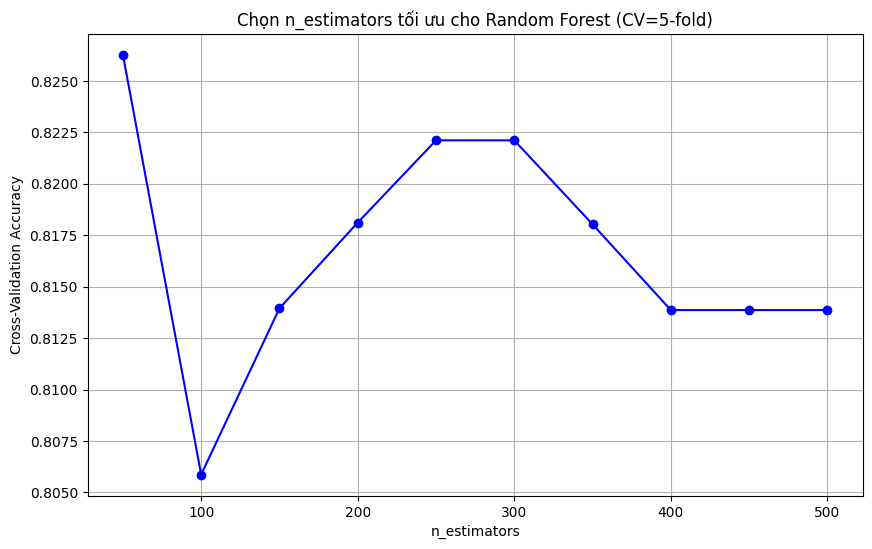

n_estimators tối ưu (CV): 50

Độ chính xác Random Forest trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác Random Forest trên tập test: 0.9032
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31

Tìm n_estimators tối ưu cho Random Forest...


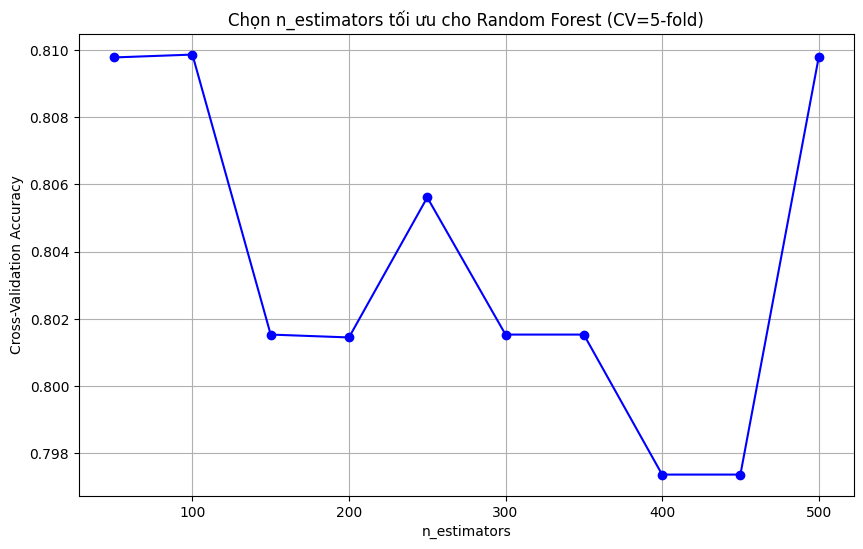

n_estimators tối ưu (CV): 100

Độ chính xác Random Forest trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Độ chính xác Random Forest trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

Tìm n_estimators tối ưu cho Random Forest...


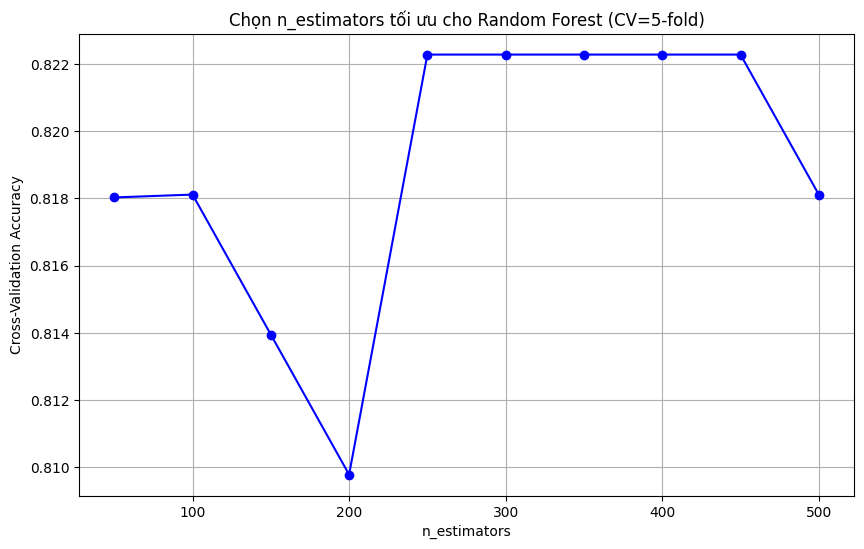

n_estimators tối ưu (CV): 250

Độ chính xác Random Forest trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Độ chính xác Random Forest trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Tìm n_estimators tối ưu cho Random Forest...


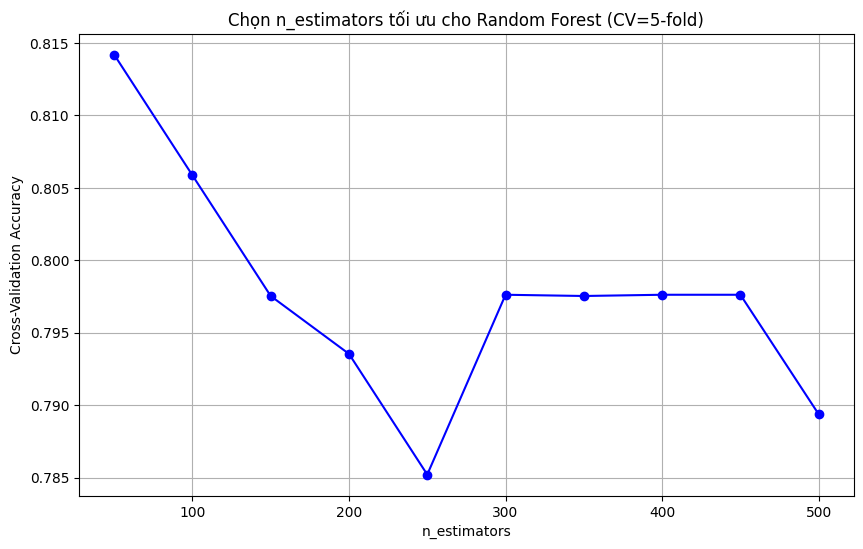

n_estimators tối ưu (CV): 50

Độ chính xác Random Forest trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác Random Forest trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [49]:
# Huấn luyện và đánh giá trên các tập dữ liệu

# RF on Original Dataset
rf_model, rf_val_acc, best_params = evaluate_val_rf(
    X_train, y_train, X_val, y_val
)
rf_test_acc = evaluate_test_rf(rf_model, X_test, y_test)

# RF on Feature Engineering Dataset
rf_model, rf_val_fe_acc, best_params = evaluate_val_rf(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
rf_test_fe_acc = evaluate_test_rf(rf_model, X_fe_test, y_fe_test)
# RF on Original DT Dataset
rf_model, rf_val_dt_acc, best_params = evaluate_val_rf(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
rf_test_dt_acc = evaluate_test_rf(rf_model, X_dt_test, y_dt_test)

# RF on Feature Engineering DT Dataset
rf_model, rf_val_fe_dt_acc, best_params = evaluate_val_rf(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val,
)
rf_test_fe_dt_acc = evaluate_test_rf(rf_model, X_fe_dt_test, y_fe_dt_test)


Saved figures to ../results/figures/


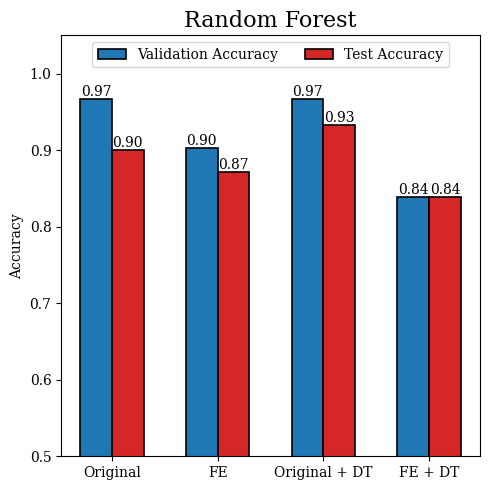

In [50]:
# *Vẽ biểu đồ so sánh hiệu suất mô hình trên các tập dữ liệu

plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [rf_val_acc, rf_test_acc, rf_val_dt_acc, rf_test_dt_acc]
test_accs = [rf_val_fe_acc, rf_test_fe_acc, rf_val_fe_dt_acc, rf_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/random_forest_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/random_forest_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")

plt.show()


## 4.AdaBoost (AB)

In [51]:
def find_optimal_ada(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3,
    learning_rate=0.1, base_max_depth=1, algorithm="SAMME"
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    for n_est in n_estimators_range:
        ada = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
            n_estimators=n_est, 
            learning_rate=learning_rate,
            algorithm=algorithm, 
            random_state=SEED
        )
        cv_score = cross_val_score(ada, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho AdaBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=base_max_depth, random_state=SEED),
        n_estimators=best_n, 
        learning_rate=learning_rate,
        algorithm=algorithm, 
        random_state=SEED
    )
    
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [52]:
def evaluate_val_ada(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50), 
                    cv_splits=3, 
                    learning_rate=0.1,
                    base_max_depth=1,
                    algorithm="SAMME"):
    print("Tìm n_estimators tối ưu cho Adaboost...")
    ada_model, best_n, cv_acc = find_optimal_ada(
        X_train, y_train, n_estimators_range=n_estimators_range, cv_splits=cv_splits,
        learning_rate=learning_rate, base_max_depth=base_max_depth, algorithm=algorithm
    )

    val_pred = ada_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f"Độ chính xác AdaBoost trên tập validation: {val_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, val_pred))
    
    return ada_model, val_acc, {"n_estimators": best_n}

def evaluate_test_ada(ada_model, X_test, y_test):
    test_pred = ada_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"Độ chính xác AdaBoost trên tập test: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, test_pred))

    return test_acc

Đánh giá trên tập Original
Tìm n_estimators tối ưu cho Adaboost...


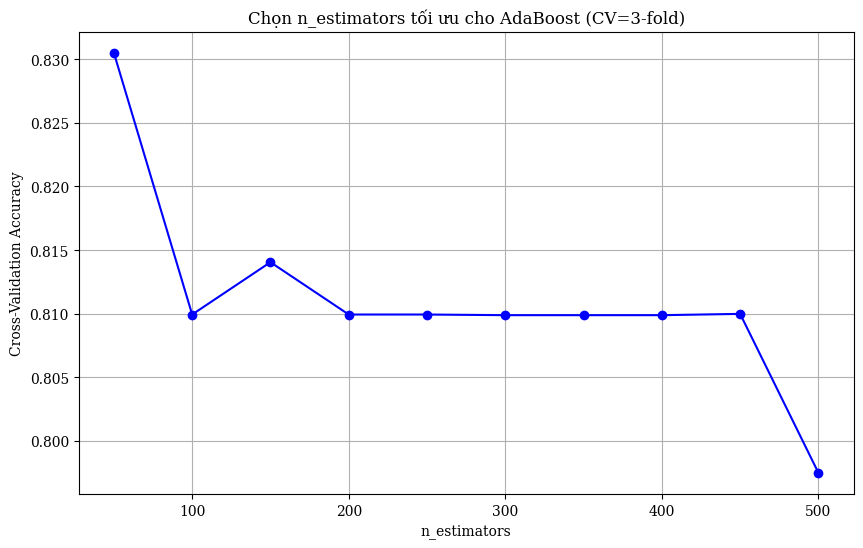

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [53]:
# AdaBoost on Original Dataset
print("Đánh giá trên tập Original")
ada_model, ada_val_acc, best_params = evaluate_val_ada(
X_train, y_train, X_val, y_val
)
ada_test_acc = evaluate_test_ada(ada_model, X_test, y_test)

Đánh giá trên tập FE
Tìm n_estimators tối ưu cho Adaboost...


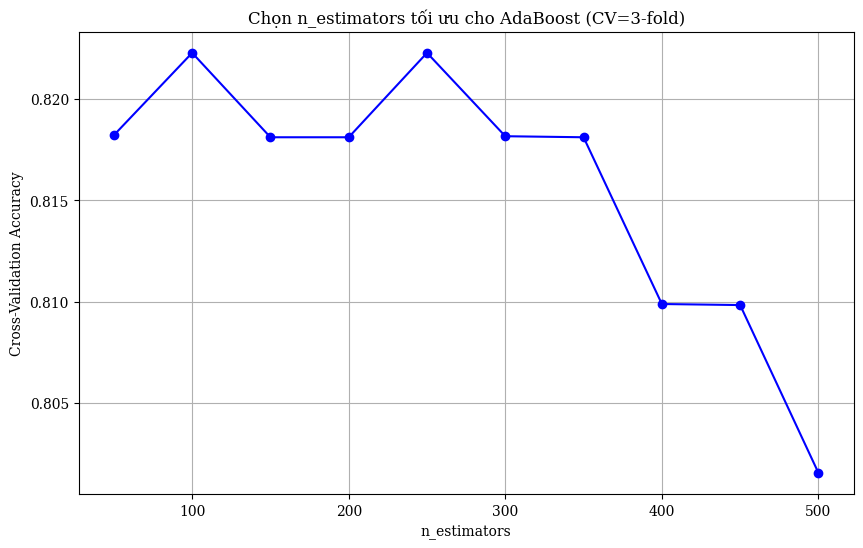

n_estimators tối ưu (CV): 100
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [54]:
# AdaBoost on FE Dataset
print("Đánh giá trên tập FE")
ada_model, ada_val_fe_acc, best_params = evaluate_val_ada(
X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
ada_test_fe_acc = evaluate_test_ada(ada_model, X_fe_test, y_fe_test)

Đánh giá trên tập Original + DT
Tìm n_estimators tối ưu cho Adaboost...


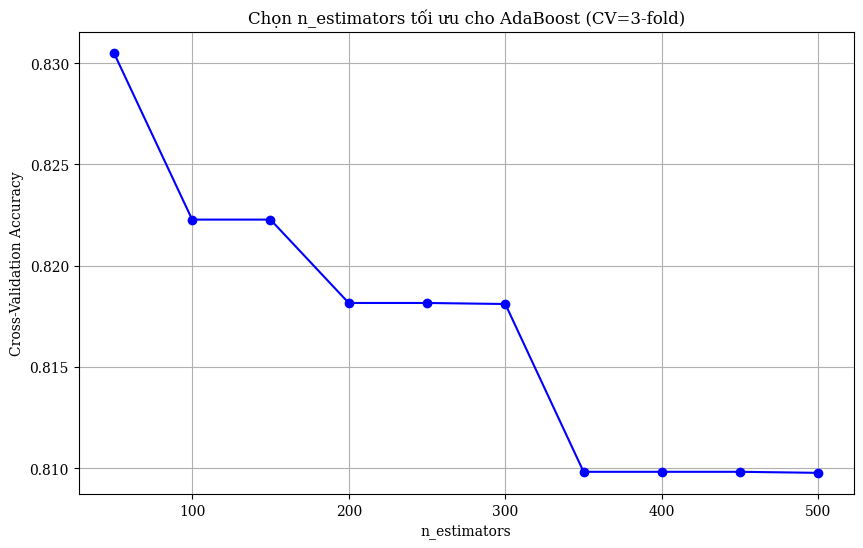

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Độ chính xác AdaBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [55]:
# AdaBoost on Original + DT
print("Đánh giá trên tập Original + DT")
ada_model, ada_val_dt_acc, best_params = evaluate_val_ada(
X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
ada_test_dt_acc = evaluate_test_ada(ada_model, X_dt_test, y_dt_test)

Đánh giá trên tập FE + DT
Tìm n_estimators tối ưu cho Adaboost...


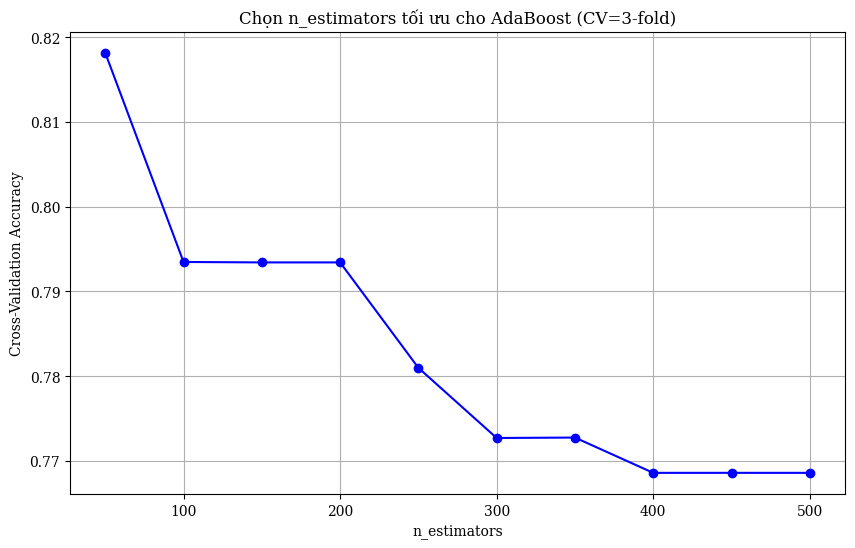

n_estimators tối ưu (CV): 50
Độ chính xác AdaBoost trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Độ chính xác AdaBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [56]:
# AdaBoost on FE + DT
print("Đánh giá trên tập FE + DT")
ada_model, ada_val_fe_dt_acc, best_params = evaluate_val_ada(
X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
ada_test_fe_dt_acc = evaluate_test_ada(ada_model, X_fe_dt_test, y_fe_dt_test)

Saved figures to ../results/figures/


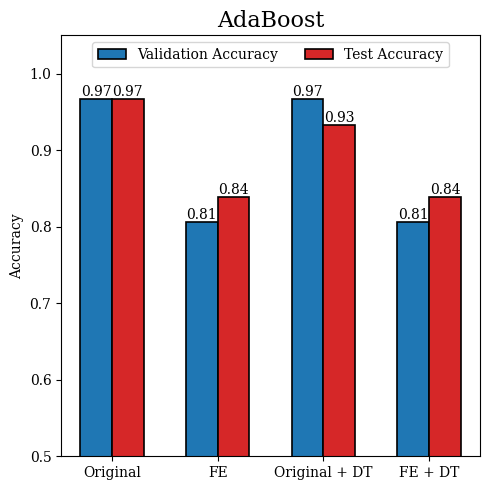

In [57]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', "FE + DT"]
val_accs = [ada_val_acc, ada_test_acc, ada_val_dt_acc, ada_test_dt_acc]
test_accs = [ada_val_fe_acc, ada_test_fe_acc, ada_val_fe_dt_acc, ada_test_fe_dt_acc]
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs,  width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('AdaBoost', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("../results/figures/adaboost_accuracy_comparison.png", dpi=300, bbox_inches="tight")
fig.savefig("../results/figures/adaboost_accuracy_comparison.pdf", bbox_inches="tight")

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/adaboost_accuracy_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/adaboost_accuracy_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")
plt.show()


## 5.Gradient Boosting

In [58]:
def find_optimal_gb(
    X_train, y_train, n_estimators_range=range(50, 501, 50), cv_splits=3
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []
    for n in n_estimators_range:
        gb = GradientBoostingClassifier(
            n_estimators=n, 
            learning_rate=0.1,
            max_depth=5,
            subsample=1.0,
            random_state=SEED
        )
        cv_score = cross_val_score(gb, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho Gradient Boosting (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = GradientBoostingClassifier(
            n_estimators=best_n, 
            learning_rate=0.1,
            max_depth=5,
            subsample=1.0,
            random_state=SEED
        )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [59]:
def evaluate_val_gb(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50),
                    cv_splits=3):
    print('Tìm n_estimators tối ưu cho Gradient Boosting...')
    gb_model, best_n, cv_acc = find_optimal_gb(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits
    )
    
    val_pred = gb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác GB trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return gb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_gb(gb_model, X_test, y_test):
    test_pred = gb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác GB trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


Tìm n_estimators tối ưu cho Gradient Boosting...


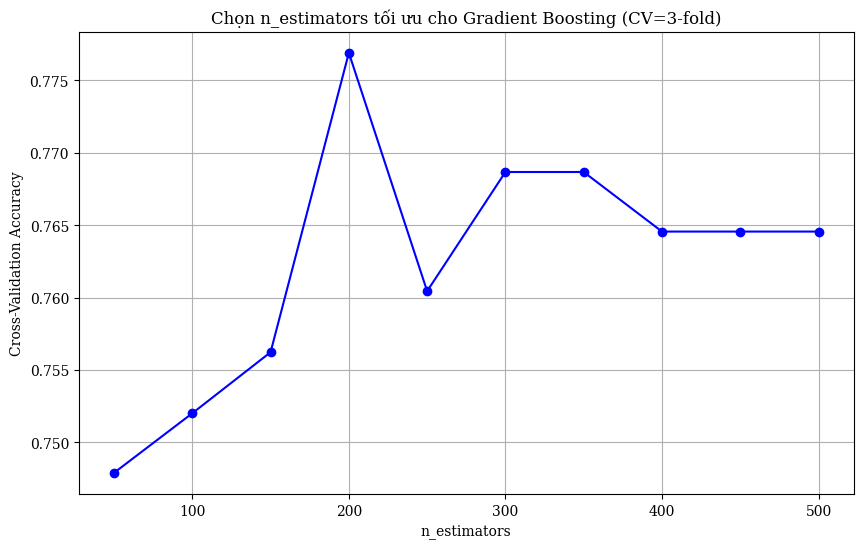

n_estimators tối ưu (CV): 200

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.78      1.00      0.88        14

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

Tìm n_estimators tối ưu cho Gradient Boosting...


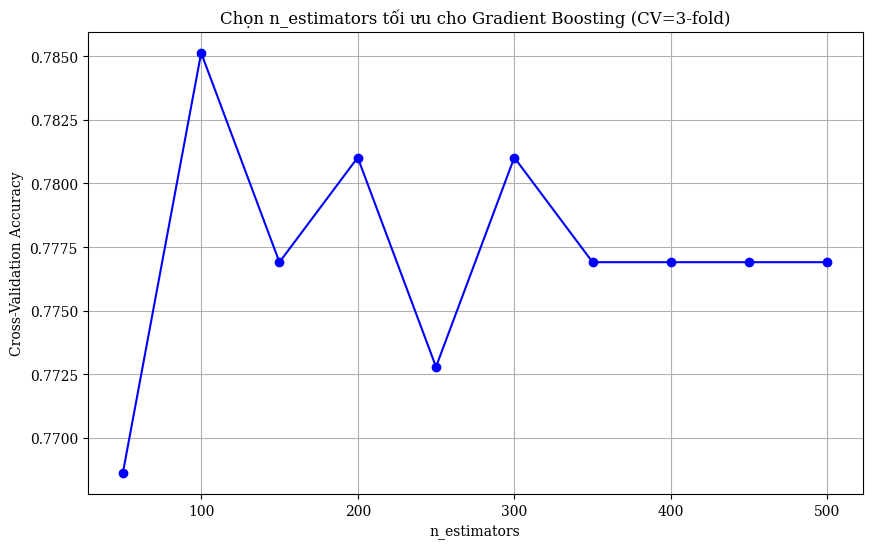

n_estimators tối ưu (CV): 100

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Tìm n_estimators tối ưu cho Gradient Boosting...


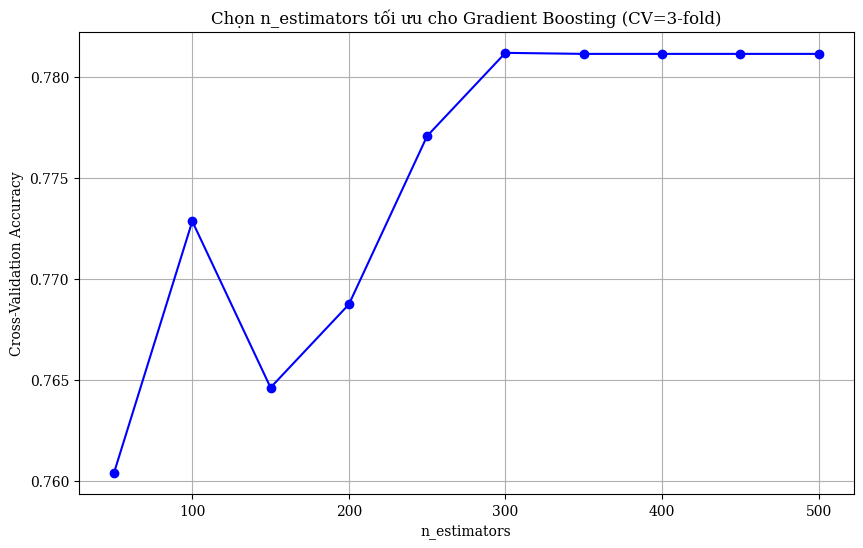

n_estimators tối ưu (CV): 300

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Tìm n_estimators tối ưu cho Gradient Boosting...


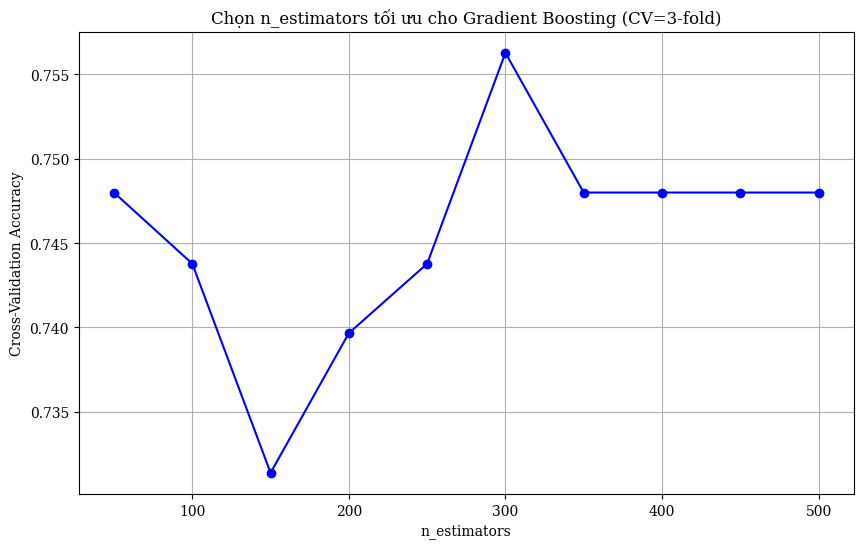

n_estimators tối ưu (CV): 300

Độ chính xác GB trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [60]:
# Gradient Boosting on Original Dataset
gb_model, gb_val_acc, gb_best_params = evaluate_val_gb(
    X_train, y_train, X_val, y_val
)
gb_test_acc = evaluate_test_gb(gb_model, X_test, y_test)

# Gradient Boosting on FE Dataset
gb_model, gb_val_fe_acc, gb_best_params = evaluate_val_gb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
gb_test_fe_acc = evaluate_test_gb(gb_model, X_fe_test, y_fe_test)

# Gradient Boosting on Original + DT
gb_model, gb_val_dt_acc, gb_best_params = evaluate_val_gb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
gb_test_dt_acc = evaluate_test_gb(gb_model, X_dt_test, y_dt_test)

# Gradient Boosting on FE + DT
gb_model, gb_val_fe_dt_acc, gb_best_params = evaluate_val_gb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
gb_test_fe_dt_acc = evaluate_test_gb(gb_model, X_fe_dt_test, y_fe_dt_test)

Saved figures to ../results/figures/


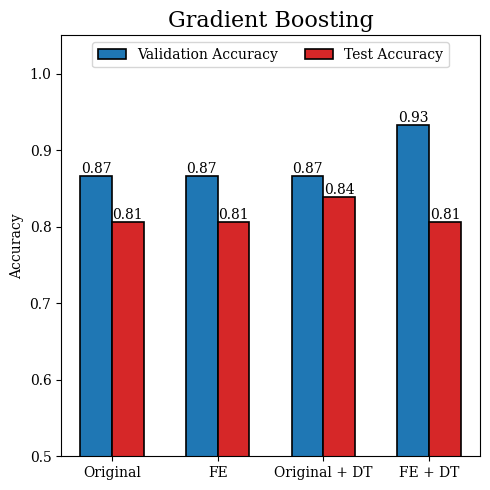

In [61]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [gb_val_acc, gb_val_fe_acc, gb_val_dt_acc, gb_val_fe_dt_acc]
test_accs = [gb_test_acc, gb_test_fe_acc, gb_test_dt_acc, gb_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('Gradient Boosting', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/gdboosting_accuracy_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/gdboosting_accuracy_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")
plt.show()


## 6.XGBoost


In [62]:
def find_optimal_xgb(
    X_train, y_train, n_estimators_range=range(50, 501, 50), 
    cv_splits=3,
    learning_rate=0.1, max_depth=5, 
    subsample=1.0, use_gpu=False
):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    n_classes = len(np.unique(y_train))
    objective = 'binary:logistic' if n_classes == 2 else 'multiL:softprob'
    eval_metric = 'logloss' if n_classes == 2 else 'mlogloss'

    for n in n_estimators_range:
        xgb = XGBClassifier(
            n_estimators=n, 
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            objective=objective,
            eval_metric=eval_metric,
            n_job=-1,
            tree_method='gpu_hist' if use_gpu else 'hist',
            verbosity=0,
            random_state=SEED
        )
        cv_score = cross_val_score(xgb, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(f'Chọn n_estimators tối ưu cho XGBoost (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'n_estimators tối ưu (CV): {best_n}')

    best_model = XGBClassifier(
            n_estimators=best_n, 
            learning_rate=learning_rate,
            max_depth=max_depth,
            subsample=subsample,
            objective=objective,
            eval_metric=eval_metric,
            n_job=-1,
            tree_method='gpu_hist' if use_gpu else 'hist',
            verbosity=0,
            random_state=SEED
        )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

In [63]:
def evaluate_val_xgb(X_train, y_train, X_val, y_val,
                     n_estimators_range=range(50, 501, 50), cv_splits=3,
                     learning_rate=0.1, max_depth=5, subsample=1.0,
                     colsample_bytree=1.0, use_gpu=False):
    print('Tìm n_estimators tối ưu cho XGBoost...')
    xgb_model, best_n, cv_acc = find_optimal_xgb(
        X_train, y_train, n_estimators_range=n_estimators_range,
        cv_splits=cv_splits, learning_rate=learning_rate,
        max_depth=max_depth, subsample=subsample, use_gpu=use_gpu
    )
    
    val_pred = xgb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nĐộ chính xác XGBoost trên tập validation: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return xgb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_xgb(xgb_model, X_test, y_test):
    test_pred = xgb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nĐộ chính xác XGBoost trên tập test: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


Tìm n_estimators tối ưu cho XGBoost...


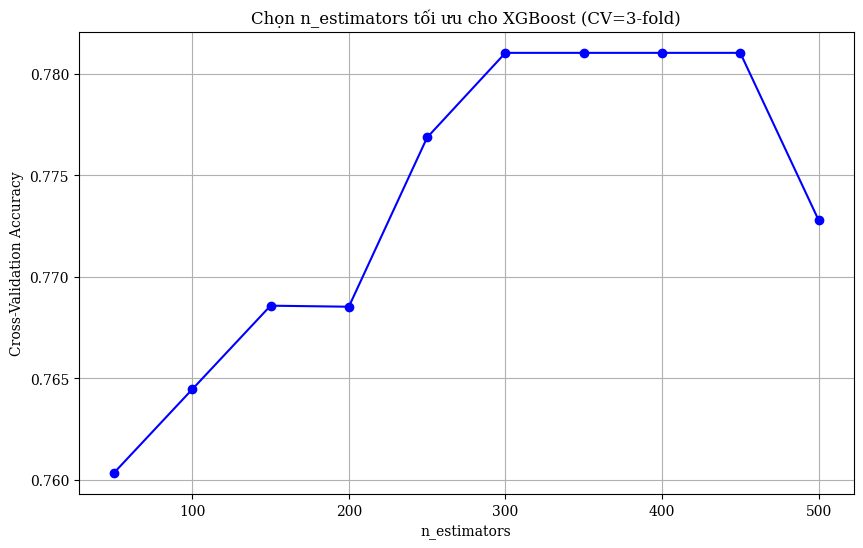

n_estimators tối ưu (CV): 300

Độ chính xác XGBoost trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Độ chính xác XGBoost trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Tìm n_estimators tối ưu cho XGBoost...


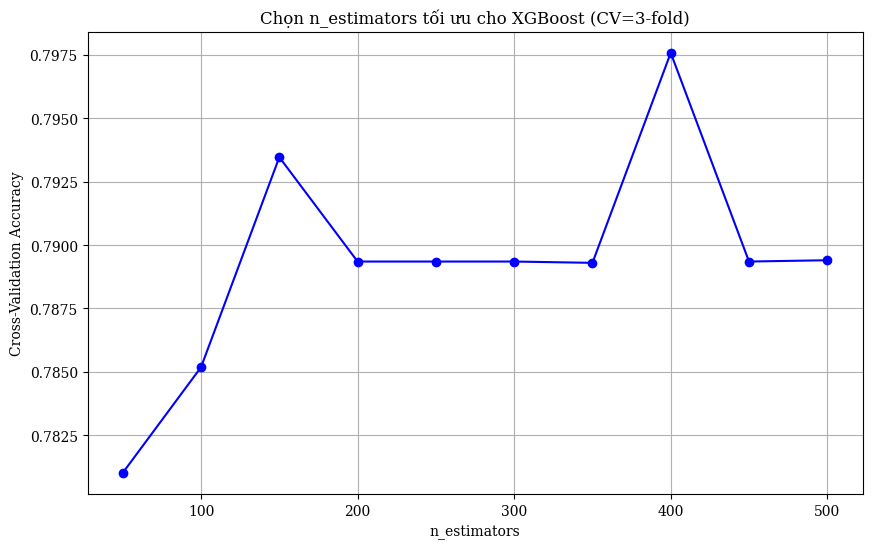

n_estimators tối ưu (CV): 400

Độ chính xác XGBoost trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác XGBoost trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31

Tìm n_estimators tối ưu cho XGBoost...


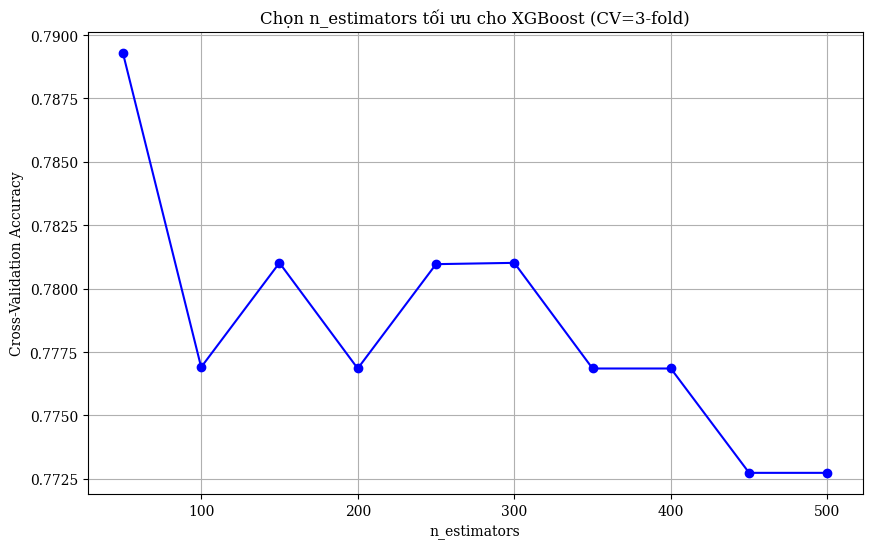

n_estimators tối ưu (CV): 50

Độ chính xác XGBoost trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30


Độ chính xác XGBoost trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

Tìm n_estimators tối ưu cho XGBoost...


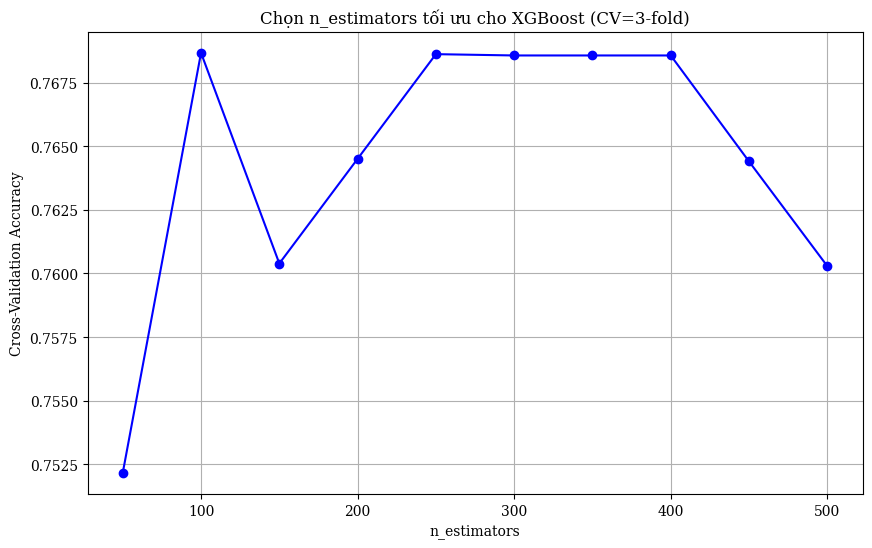

n_estimators tối ưu (CV): 100

Độ chính xác XGBoost trên tập validation: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Độ chính xác XGBoost trên tập test: 0.8710
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



In [64]:
# XGBoost on Original Dataset
xgb_model, xgb_val_acc, xgb_best_params = evaluate_val_xgb(
    X_train, y_train, X_val, y_val
)
xgb_test_acc = evaluate_test_xgb(xgb_model, X_test, y_test)

# XGBoost on FE Dataset
xgb_model, xgb_val_fe_acc, xgb_best_params = evaluate_val_xgb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)
xgb_test_fe_acc = evaluate_test_xgb(xgb_model, X_fe_test, y_fe_test)

# XGBoost on Original + DT
xgb_model, xgb_val_dt_acc, xgb_best_params = evaluate_val_xgb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)
xgb_test_dt_acc = evaluate_test_xgb(xgb_model, X_dt_test, y_dt_test)

# XGBoost on FE + DT
xgb_model, xgb_val_fe_dt_acc, xgb_best_params = evaluate_val_xgb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val
)
xgb_test_fe_dt_acc = evaluate_test_xgb(xgb_model, X_fe_dt_test, y_fe_dt_test)

Saved figures to ../results/figures/


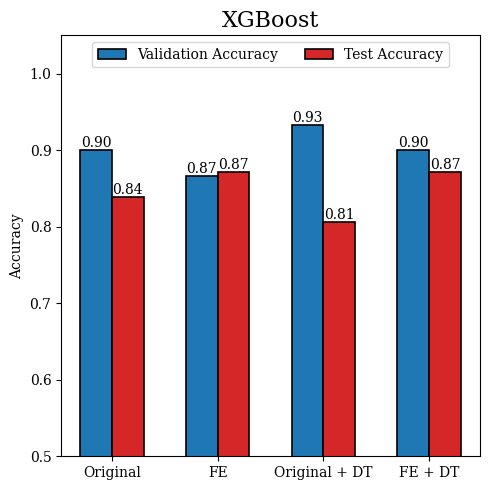

In [65]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', 'FE + DT']
val_accs = [xgb_val_acc, xgb_val_fe_acc, xgb_val_dt_acc, xgb_val_fe_dt_acc]
test_accs = [xgb_test_acc, xgb_test_fe_acc, xgb_test_dt_acc, xgb_test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs, width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('XGBoost', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc='upper center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save to results/figures
save_dir = '../results/figures'
os.makedirs(save_dir, exist_ok=True)
fig.savefig(f'{save_dir}/xgboost_accuracy_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig(f'{save_dir}/xgboost_accuracy_comparison.pdf', bbox_inches='tight')
print(f"Saved figures to {save_dir}/")
plt.show()

## 7. Summary

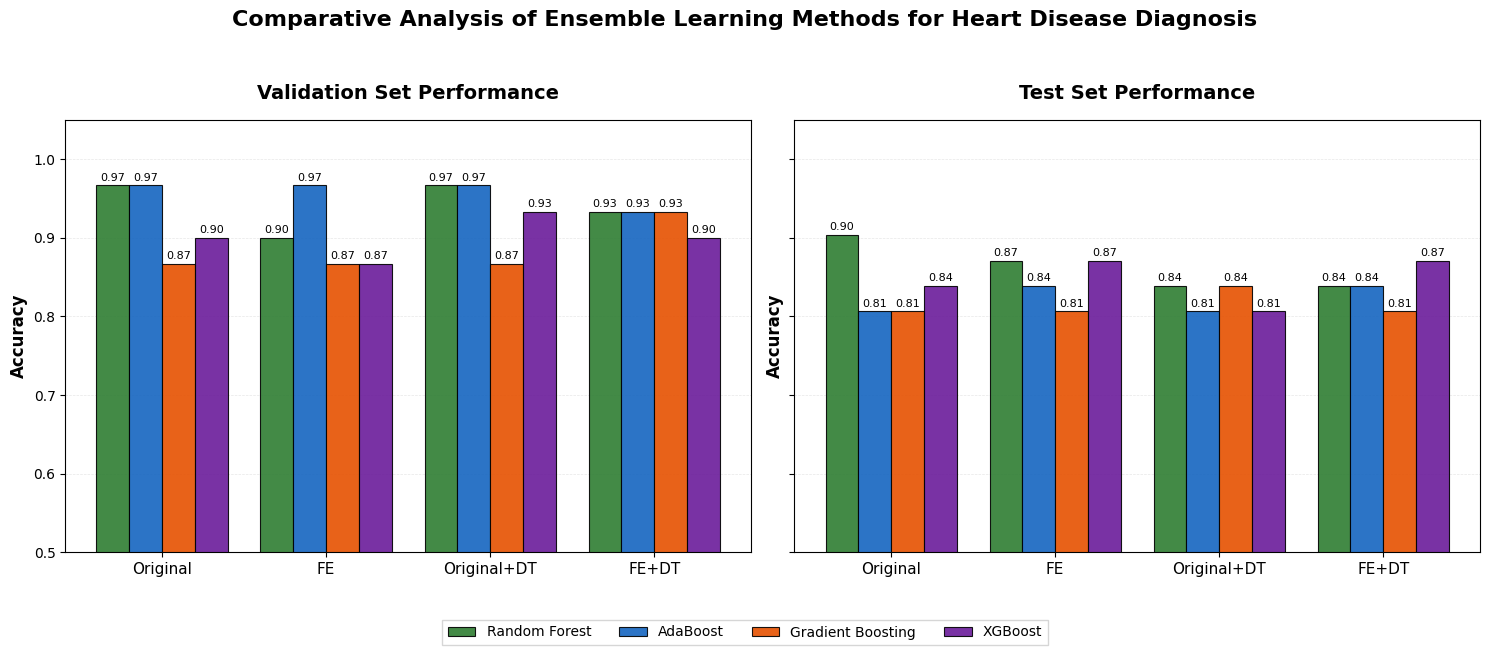

In [66]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10

# Định nghĩa màu sắc chuyên nghiệp
colors = {
    'rf': '#2E7D32',     # Xanh lá đậm
    'ada': '#1565C0',    # Xanh dương đậm
    'gb': '#E65100',     # Cam đậm
    'xgb': '#6A1B9A'     # Tím đậm
}

datasets = ['Original', 'FE', 'Original+DT', 'FE+DT']

# Tổng hợp kết quả validation
rf_val_scores = [rf_val_acc, rf_val_fe_acc, rf_val_dt_acc, rf_val_fe_dt_acc]
ada_val_scores = [ada_val_acc, ada_val_fe_acc, ada_val_dt_acc, ada_val_fe_dt_acc]
gb_val_scores = [gb_val_acc, gb_val_fe_acc, gb_val_dt_acc, gb_val_fe_dt_acc]
xgb_val_scores = [xgb_val_acc, xgb_val_fe_acc, xgb_val_dt_acc, xgb_val_fe_dt_acc]

# Tổng hợp kết quả test
rf_test_scores = [rf_test_acc, rf_test_fe_acc, rf_test_dt_acc, rf_test_fe_dt_acc]
ada_test_scores = [ada_test_acc, ada_test_fe_acc, ada_test_dt_acc, ada_test_fe_dt_acc]
gb_test_scores = [gb_test_acc, gb_test_fe_acc, gb_test_dt_acc, gb_test_fe_dt_acc]
xgb_test_scores = [xgb_test_acc, xgb_test_fe_acc, xgb_test_dt_acc, xgb_test_fe_dt_acc]

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

x_pos = np.arange(len(datasets))
width = 0.2  # Điều chỉnh width cho 4 bars

# Validation Accuracy Plot
bars1_val = ax1.bar(x_pos - 1.5*width, rf_val_scores, width, 
                    label='Random Forest', color=colors['rf'], 
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars2_val = ax1.bar(x_pos - 0.5*width, ada_val_scores, width,
                    label='AdaBoost', color=colors['ada'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars3_val = ax1.bar(x_pos + 0.5*width, gb_val_scores, width,
                    label='Gradient Boosting', color=colors['gb'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)
bars4_val = ax1.bar(x_pos + 1.5*width, xgb_val_scores, width,
                    label='XGBoost', color=colors['xgb'],
                    edgecolor='black', linewidth=0.8, alpha=0.9)

ax1.set_ylim(0.5, 1.05)
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='semibold')
ax1.set_title('Validation Set Performance', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(datasets, fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Test Accuracy Plot
bars1_test = ax2.bar(x_pos - 1.5*width, rf_test_scores, width,
                     label='Random Forest', color=colors['rf'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars2_test = ax2.bar(x_pos - 0.5*width, ada_test_scores, width,
                     label='AdaBoost', color=colors['ada'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars3_test = ax2.bar(x_pos + 0.5*width, gb_test_scores, width,
                     label='Gradient Boosting', color=colors['gb'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)
bars4_test = ax2.bar(x_pos + 1.5*width, xgb_test_scores, width,
                     label='XGBoost', color=colors['xgb'],
                     edgecolor='black', linewidth=0.8, alpha=0.9)

ax2.set_ylim(0.5, 1.05)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='semibold')
ax2.set_title('Test Set Performance', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(datasets, fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax2.set_axisbelow(True)

# Thêm giá trị lên các cột
def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                   xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 2),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=8, fontweight='medium')

# Áp dụng annotations
for bars in [bars1_val, bars2_val, bars3_val, bars4_val]:
    annotate_bars(ax1, bars)
for bars in [bars1_test, bars2_test, bars3_test, bars4_test]:
    annotate_bars(ax2, bars)

# Legend chung
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05),
          ncol=4, frameon=True, fontsize=10, fancybox=False, shadow=False)

# Main title
fig.suptitle('Comparative Analysis of Ensemble Learning Methods for Heart Disease Diagnosis',
            fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])

# Save figure với DPI cao
save_path = '../results/figures'
os.makedirs(save_path, exist_ok=True)
plt.savefig(f'{save_path}/ensemble_comparison_4models.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{save_path}/ensemble_comparison_4models.pdf', bbox_inches='tight')

plt.show()
